# LPG Bullet data analysis

In [1]:
# Import required objects.
from propylean import properties as prop
from propylean import Bullet
from propylean.series import Series as pplSeries

/home/abhishekr/.local/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
# Creating Bullet object for analysis.
lpg_1 = Bullet(tag="LPG-2101",
               ID=prop.Length(3.5, "m"),
               length=prop.Length(36, "m"),
               thickness=prop.Length(20, "mm"))
lpg_1

Bullet with tag: LPG-2101

### Set operation and control parameters.

In [3]:
# Normal operating temperature and pressure.
lpg_1.operating_pressure = prop.Pressure(6, "bar")
lpg_1.operating_temperature = prop.Temperature(55, "C")

# Liquid level settings.
lpg_1.LLLL = prop.Length(0.5, "m")
lpg_1.LLL = prop.Length(1, "m")
lpg_1.NLL = prop.Length(1.5, "m")
lpg_1.HLL = prop.Length(2, "m")
lpg_1.HHLL = prop.Length(3, "m")

### Get the operations data.

In [4]:
# Import data from source as Pandas DataFrame.
import pandas as pd
df = pd.read_csv("LPG_bullet_data.csv", sep=";")
print(df.columns)

Index(['Unnamed: 0', 'time(s)', 'operating_temp(C)', 'operating_press(bar)',
       'liquid_level(cm)'],
      dtype='object')


In [5]:
# Assign timeseries data to Bullet object properties.
from propylean.properties import Length, Pressure, Temperature
lpg_1.liquid_level = pplSeries(df["liquid_level(cm)"]/100, prop=Length, unit="m")
lpg_1.operating_pressure = pplSeries(df["operating_press(bar)"], prop=Pressure, unit="bar")
lpg_1.operating_temperature = pplSeries(df["operating_temp(C)"], prop=Temperature, unit="C")

### Preliminary data exploration using describe method.

In [6]:
lpg_1.liquid_level

Property: Length
unit: m
------------------
1.5219999999999998
1.521
1.5219999999999998
1.5165
1.5219999999999998
:
:
------------------

In [7]:
lpg_1.operating_pressure

Property: Pressure
unit: bar
----
6.55
6.6
6.95
6.15
6.65
:
:
----

In [8]:
lpg_1.operating_temperature

Property: Temperature
unit: C
----
55.4
55.7
55.3
55.7
55.2
:
:
----

### Creating graph for each properties.

<Axes: title={'center': 'Liquid level in Bullet LPG-2101'}, xlabel='Time (s)', ylabel='Liquid-level (m)'>

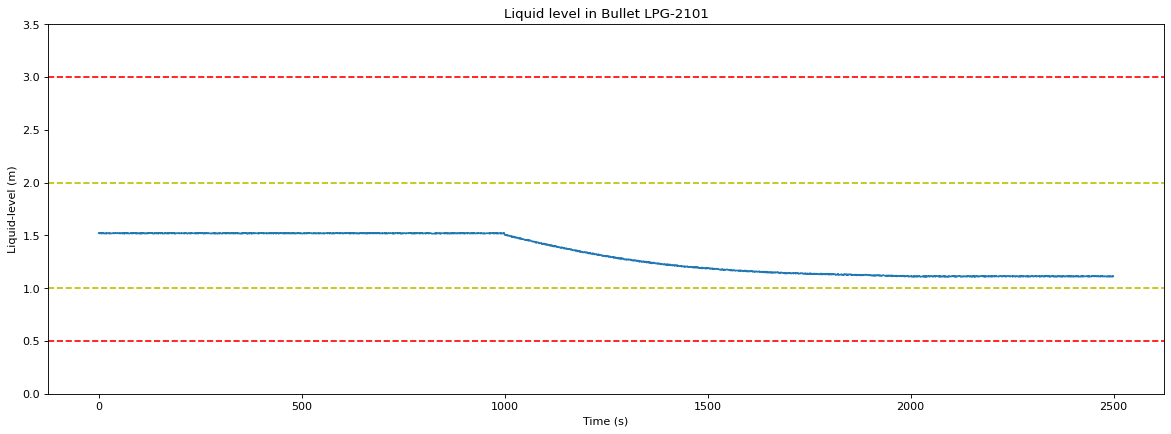

In [9]:
# Import plotting library.
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6), dpi=80)


# Labelling 
plt.ylabel("Liquid-level (m)") 
plt.xlabel("Time (s)")
plt.title("Liquid level in Bullet " + lpg_1.tag)

# Set plot limits.
plt.ylim(0, lpg_1.ID.value)
plt.axhline(y=lpg_1.HHLL.value, color='r', linestyle='--', )
plt.axhline(y=lpg_1.LLLL.value, color='r', linestyle='--', )
plt.axhline(y=lpg_1.HLL.value, color='y', linestyle='--', )
plt.axhline(y=lpg_1.LLL.value, color='y', linestyle='--', )


# Plot
lpg_1.liquid_level.plot()

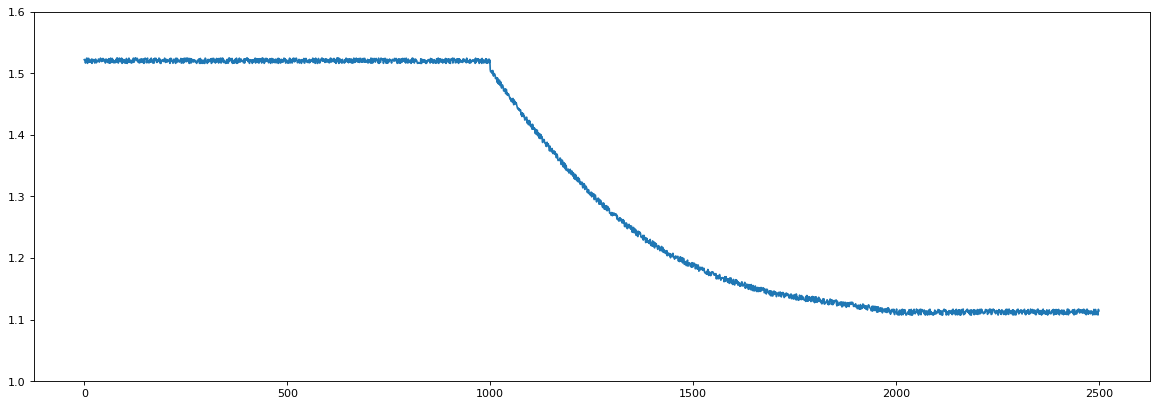

In [10]:
# Zoom in.
plt.figure(figsize=(18, 6), dpi=80)
# Plot
lpg_1.liquid_level.plot()
plt.ylim(1, 1.6)
plt.show()

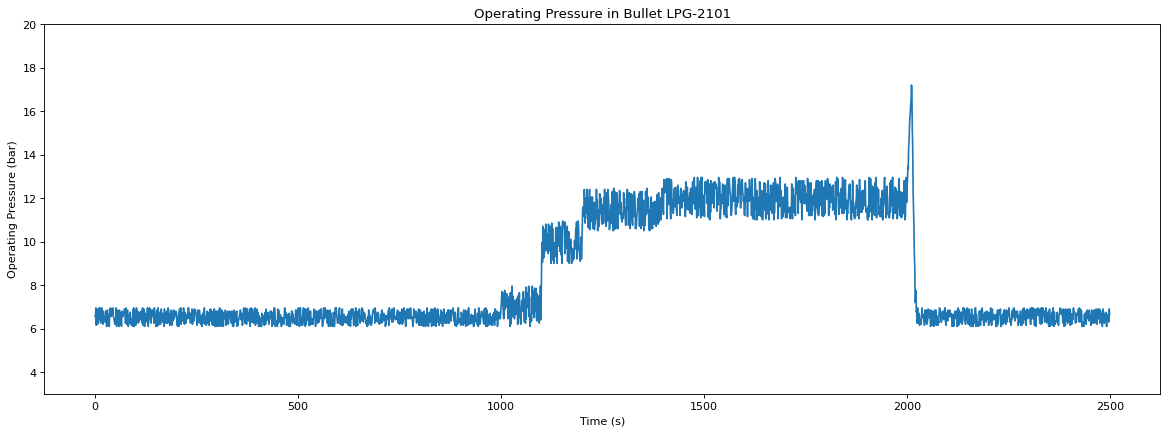

In [11]:
plt.figure(figsize=(18, 6), dpi=80)
# Plot
lpg_1.operating_pressure.plot()
plt.ylim(3, 20)

# Labelling 
plt.ylabel("Operating Pressure (bar)")  # add X-axis label
plt.xlabel("Time (s)")  # add Y-axis label
plt.title("Operating Pressure in Bullet " + lpg_1.tag)  # add title

# Display
plt.show()

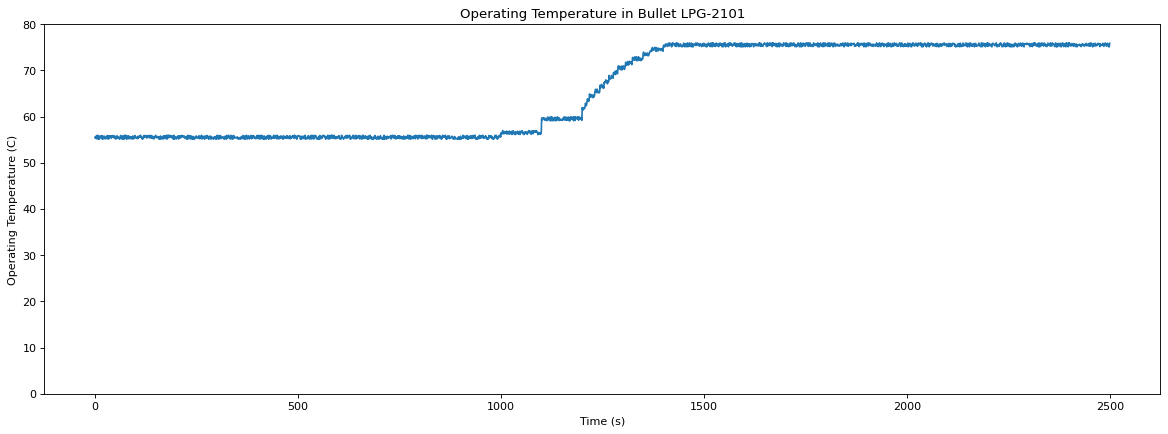

In [12]:
plt.figure(figsize=(18, 6), dpi=80)
# Plot
lpg_1.operating_temperature.plot()
plt.ylim(0, 80)
# Labelling 
plt.ylabel("Operating Temperature (C)")  # add X-axis label
plt.xlabel("Time (s)")  # add Y-axis label
plt.title("Operating Temperature in Bullet " + lpg_1.tag)  # add title

# Display
plt.show()

In [13]:
lpg_1.delete()
del lpg_1